<a href="https://colab.research.google.com/github/skywalker0803r/ruby_research/blob/main/crypto/LPPL(%E6%B3%A1%E6%B2%AB%E7%A0%B4%E8%A3%82%E9%A0%90%E6%B8%AC%E6%A8%A1%E5%9E%8B)_%E8%B6%85%E5%8F%83%E6%95%B8%E8%87%AA%E5%8B%95%E6%90%9C%E7%B4%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install optuna >log.txt

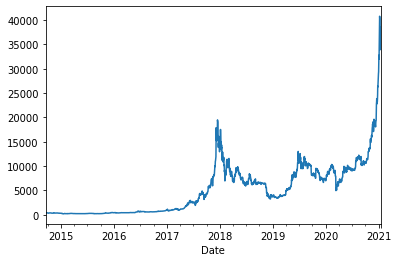

In [17]:
try:
    import yfinance as yf
except:
    !pip install lppls > log.txt
    !pip install yfinance > log.txt

asset_symbol = "BTC-USD"

import yfinance as yf
stock = yf.Ticker(asset_symbol)
data = stock.history(period="max")

data.Close.plot()

In [18]:
import optuna
from lppls import lppls, data_loader
import numpy as np
import pandas as pd

def objective(trial):
    ndates = trial.suggest_uniform('ndates',1,500)
    ndates = int(ndates)
    variable_name = "2021-01-14"
    latest_data = data.loc[:variable_name].iloc[-ndates:]
    time = np.linspace(0, len(latest_data)-1, len(latest_data))
    price = np.log(latest_data['Close'].values)
    observations = np.array([time, price])
    MAX_SEARCHES = 25
    lppls_model = lppls.LPPLS(observations=observations)
    tc, m, w, a, b, c, c1, c2 = lppls_model.fit(observations, MAX_SEARCHES, minimizer='Nelder-Mead')
    loss1 = max(b,0) # b<0
    loss2 = min(abs(c),1) # |c| < 1
    loss3 = (m - 0.5)**2 #(0 < m < 1)
    total_loss = loss1 + loss2 + loss3
    return total_loss

study = optuna.create_study()
study.optimize(objective, n_trials=250)
study.best_params

[I 2021-01-14 11:10:27,910] A new study created in memory with name: no-name-7cedb6e1-6c06-4506-be6c-03b66e62d3c8
[I 2021-01-14 11:10:28,110] Trial 0 finished with value: 117216.26566592877 and parameters: {'ndates': 405.0381088713153}. Best is trial 0 with value: 117216.26566592877.
[I 2021-01-14 11:10:28,148] Trial 1 finished with value: 0.20362888249792682 and parameters: {'ndates': 17.66640566426012}. Best is trial 1 with value: 0.20362888249792682.
[I 2021-01-14 11:10:28,221] Trial 2 finished with value: 0.05263640345645609 and parameters: {'ndates': 120.70514602868764}. Best is trial 2 with value: 0.05263640345645609.
[I 2021-01-14 11:10:28,305] Trial 3 finished with value: 64605354583.65965 and parameters: {'ndates': 131.09748114659342}. Best is trial 2 with value: 0.05263640345645609.
[I 2021-01-14 11:10:28,407] Trial 4 finished with value: 49950986497604.24 and parameters: {'ndates': 70.12922110882715}. Best is trial 2 with value: 0.05263640345645609.
[I 2021-01-14 11:10:28,72

{'ndates': 105.71706516917195}

In [19]:
study.best_params

{'ndates': 105.71706516917195}